# CS 457 - Homework Assignment 5: SQL
## Ali Hashir
### ah05433@st.habib.edu.pk

In [333]:
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
conn = psycopg2.connect(
    host="localhost",
    database="employee_attribution",
    user="postgres",
    password="35442326")

In [335]:
df_1 = psql.read_sql('select * from employee_attr_1', conn)
df_2 = psql.read_sql('select * from employee_attr_2', conn)
# inner join df1 and df2 on df1.emplyeenumber = df2.emplyeenumber
df = pd.merge(df_1, df_2, on='employeenumber')


In [336]:
conn.close()

##### Analysis 1


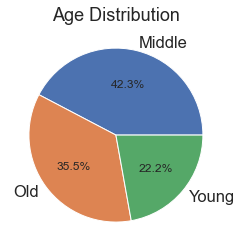

In [337]:
df['age_group'] = np.where(df['age'] < 30, 'Young', np.where(df['age'] < 40, 'Middle', 'Old'))
plt.pie(df['age_group'].value_counts(), labels=df['age_group'].value_counts().index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

Most of the employees in the company are middle aged i.e (30-40) constituting (42.3%) of the total employees.

##### Analysis 2

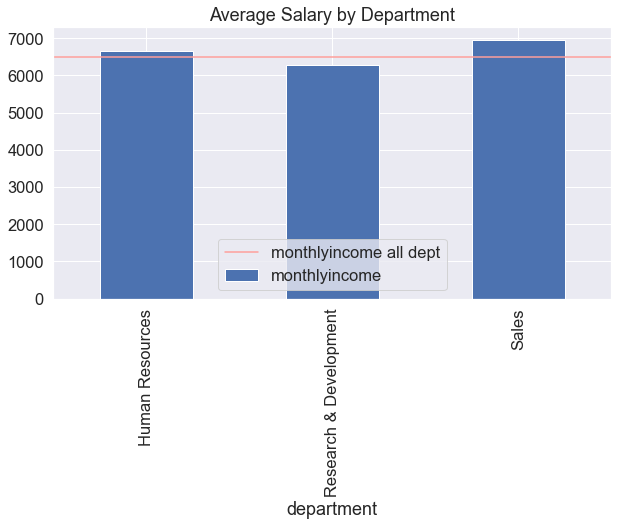

In [338]:
tdf1= df.groupby('department').agg({'monthlyincome':'mean'})
tdf1.plot(kind='bar', figsize=(10,5))
plt.title('Average Salary by Department')
avg_salary = df['monthlyincome'].mean()
plt.axhline(y=avg_salary, color='r', linestyle='-', label='monthlyincome all dept')
plt.legend()


The sales department is the most highly paid department in the company. While R&D department is the least paid department.

##### Analysis 3

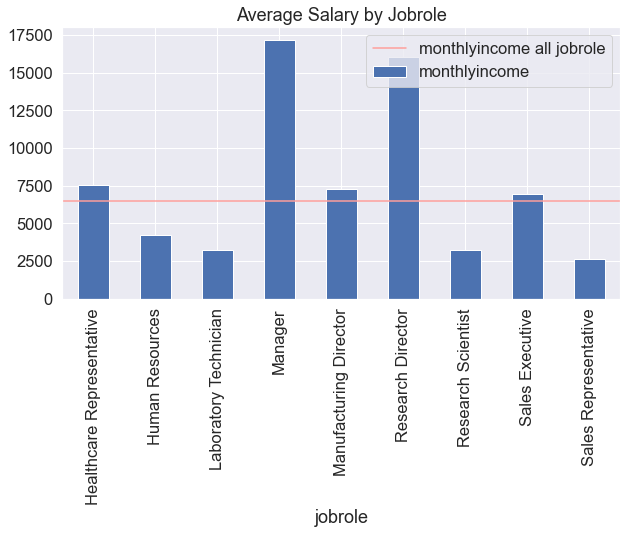

In [339]:
tdf1 = df.groupby('jobrole').agg({'monthlyincome': 'mean'})
tdf1.plot(kind='bar', figsize=(10, 5))
plt.title('Average Salary by Jobrole')
avg_salary = df['monthlyincome'].mean()
plt.axhline(y=avg_salary, color='r', linestyle='-',
            label='monthlyincome all jobrole')
plt.legend()


The manager and reserach director are the most highly paid jobroles. While health care representative, manufacturing director and sales executive are still paid more than the avg salary of company. Other jobroles are paid less than the avg salary of company.

##### Analysis 4

<AxesSubplot:>

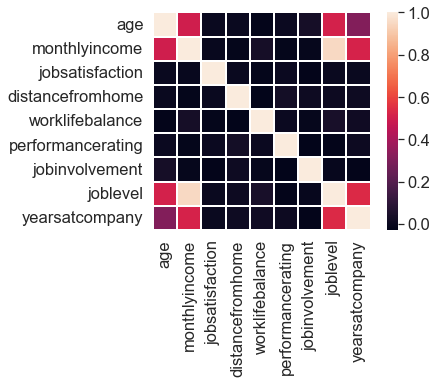

In [340]:
tdf = df[['age', 'monthlyincome', 'jobsatisfaction',
          'distancefromhome', 'worklifebalance', 'performancerating', 'jobinvolvement', 'joblevel', 'yearsatcompany']]
corr = tdf.corr()
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, square=True, linewidths=.2)


Only Age, joblevel and years at company are satistically coreleated with the income.
Jobsatisfaction, involvement and perfomance are not statistically corelated with the income. Therefore at this company no matter how well you perform you will only get paid high if you have worked for the company for a long time.